In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Carregar o conjunto de dados MNIST e dividir em treinamento e teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os valores dos pixels para o intervalo [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Converter as etiquetas para codificação one-hot
# Para serem usadas como alvos no treinamento
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Verificando as dimensões dos conjuntos
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000, 10)
X_test: (10000, 28, 28)
y_test: (10000, 10)


In [ ]:
# Plota imagens aleatorios do dataset
def printImg(x, y, RotuloPred = False):
  random_indices = np.random.randint(0, len(x_test), 25)
  images = x[random_indices]
  labels = y[random_indices]
  plt.figure(figsize=(10,10))
  for idx in range(len(random_indices)):
      image = images[idx]
      label = labels[idx]
      plt.subplot(5, 5, idx + 1)
      plt.imshow(image, cmap='gray')
      plt.axis('off')
      if (RotuloPred == True):
        prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
        plt.title(f'Label: {label.argmax()}, Predicted: {prediction}',fontsize=9)
      else:
        plt.title(f'Label: {label.argmax()}')

  plt.show()

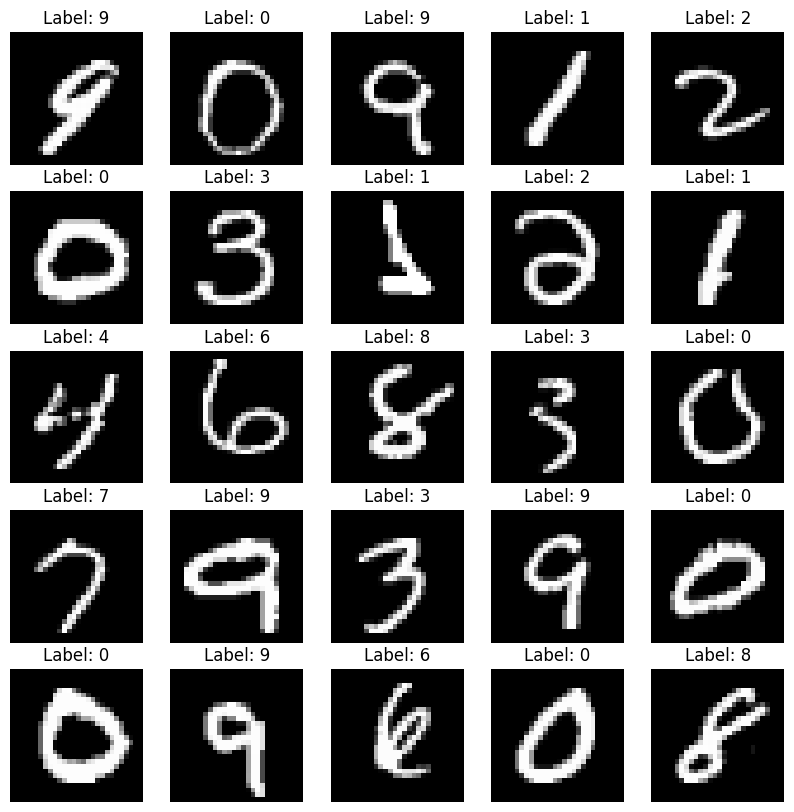

In [ ]:
printImg(x_test,y_test,False)

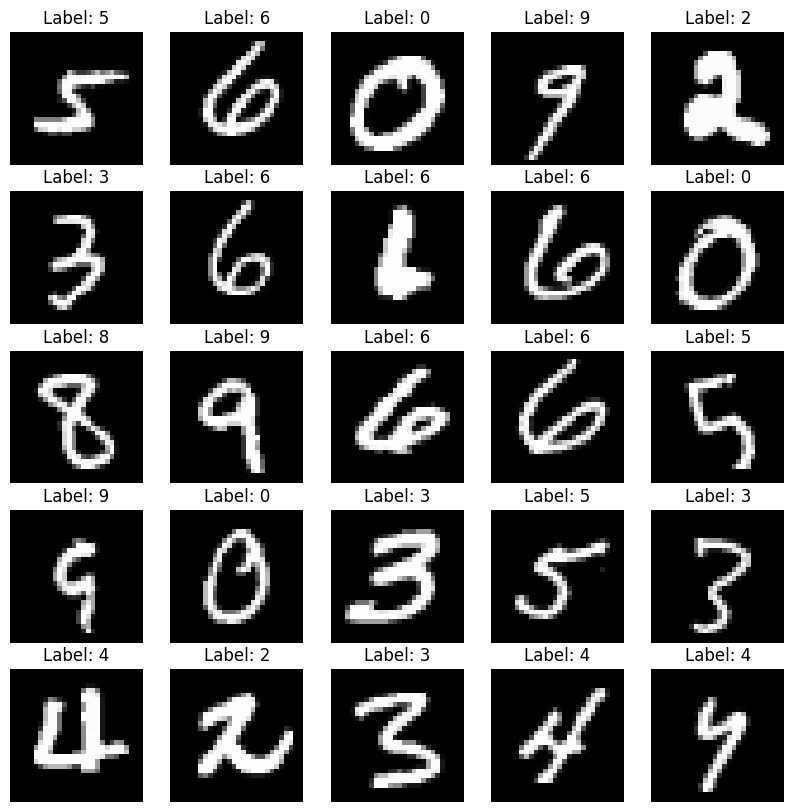

In [ ]:
printImg(x_train,y_train,False)

In [ ]:
# Criar o modelo da DNN
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar a imagem de 28x28 pixels
    Dense(128, activation='relu'),  # Camada oculta com ativação ReLU (Rectified Linear Activation)
    Dense(64, activation='relu'),   # Camada oculta com ativação ReLU (Rectified Linear Activation)
    Dense(10, activation='softmax') # Camada de saída com ativação Softmax para classificação
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# Compilar o modelo
model.compile(
    # "Adam" (Adaptive Moment Estimation)
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Treinar o modelo
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Avaliar o desempenho do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Epoch 1/50
750/750 [==============================] - 8s 8ms/step - loss: 0.3045 - accuracy: 0.9123 - val_loss: 0.1526 - val_accuracy: 0.9559
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.1268 - accuracy: 0.9623 - val_loss: 0.1249 - val_accuracy: 0.9627
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0869 - accuracy: 0.9736 - val_loss: 0.1040 - val_accuracy: 0.9688
Epoch 4/50
750/750 [==============================] - 3s 5ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0954 - val_accuracy: 0.9720
Epoch 5/50
750/750 [==============================] - 5s 6ms/step - loss: 0.0494 - accuracy: 0.9851 - val_loss: 0.0930 - val_accuracy: 0.9728
Epoch 6/50
750/750 [==============================] - 4s 5ms/step - loss: 0.0382 - accuracy: 0.9881 - val_loss: 0.0909 - val_accuracy: 0.9755
Epoch 7/50
750/750 [==============================] - 3s 5ms/step - loss: 0.0339 - accuracy: 0.9889 - val_loss: 0.0923 - val_accuracy: 0.9743
Epoch 

1/1 [==============================] - 0s 20ms/step


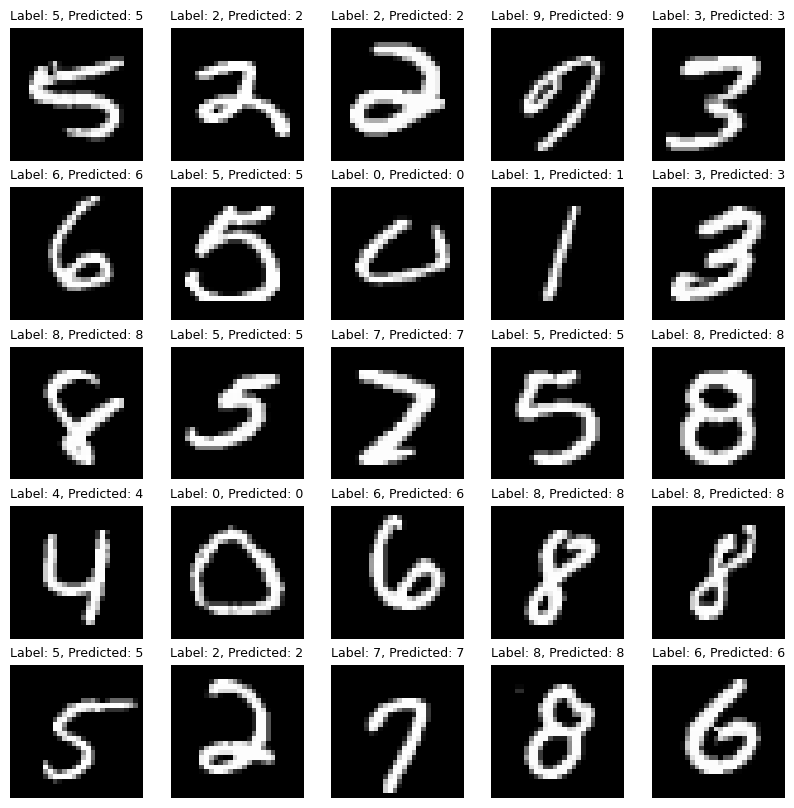

In [ ]:
printImg(x_test,y_test,True)

313/313 [==============================] - 1s 2ms/step
Quantidade de Previsões erradas: 227
Indices Selecionados: [2371 2387 5997 3520 2778 5973 9664 4966 1878 2414 8094 9716  956 1112
 1522 2610 6166  844 1228 2995 1901 1751 3727 4548  716]


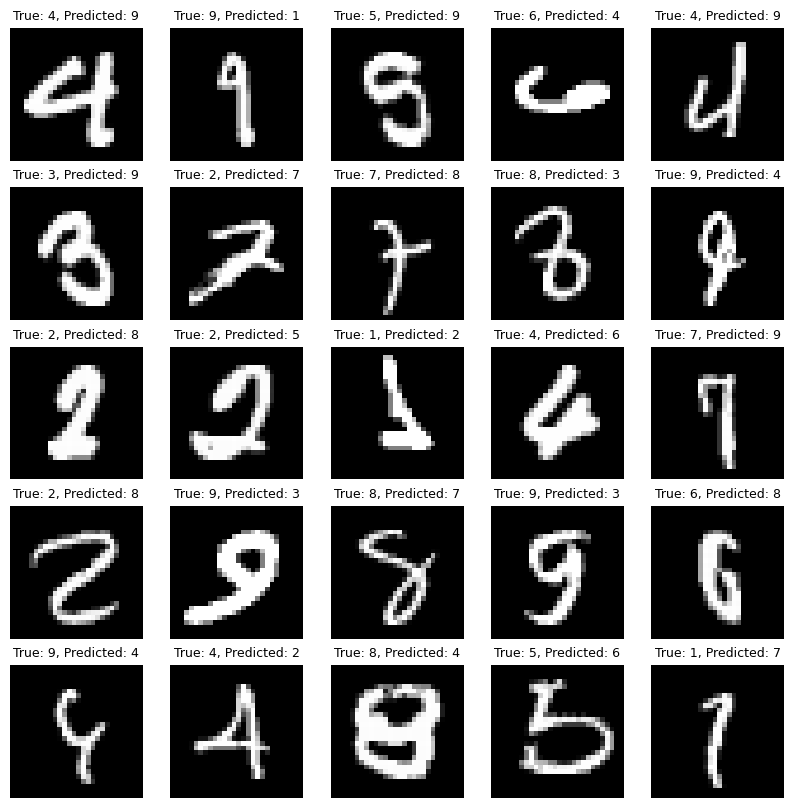

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Encontrar índices das previsões erradas
incorrect_indices = np.where(predicted_labels != true_labels)[0]
print(f'Quantidade de Previsões erradas: {len(incorrect_indices)}')
if(len(incorrect_indices) < 25):
  random_indices = np.random.choice(incorrect_indices,size= len(incorrect_indices),replace=True)
else:
  random_indices = np.random.choice(incorrect_indices, 25,replace=True)
print(f'Indices Selecionados: {random_indices}')
images = x_test[random_indices]
labels = true_labels[random_indices]
predicted = predicted_labels[random_indices]
plt.figure(figsize=(10,10))

for idx in range(len(random_indices)):
    image = images[idx]
    true_label = labels[idx]
    predicted_label = predicted[idx]
    plt.subplot(5, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}',fontsize=9)
plt.show()

In [ ]:
# Criar o modelo da DNN
modelSGD = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar a imagem de 28x28 pixels
    Dense(128, activation='relu'),  # Camada oculta com ativação ReLU (Rectified Linear Activation)
    Dense(64, activation='relu'),   # Camada oculta com ativação ReLU (Rectified Linear Activation)
    Dense(10, activation='softmax') # Camada de saída com ativação Softmax para classificação
])

modelSGD.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar o modelo
modelSGD.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Treinar o modelo
modelSGD.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Avaliar o desempenho do modelo no conjunto de teste
test_loss, test_accuracy = modelSGD.evaluate(x_test, y_test)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

Epoch 1/50
750/750 [==============================] - 4s 5ms/step - loss: 1.1099 - accuracy: 0.7140 - val_loss: 0.4673 - val_accuracy: 0.8817
Epoch 2/50
750/750 [==============================] - 4s 5ms/step - loss: 0.4174 - accuracy: 0.8855 - val_loss: 0.3431 - val_accuracy: 0.9052
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3396 - accuracy: 0.9044 - val_loss: 0.2971 - val_accuracy: 0.9169
Epoch 4/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3021 - accuracy: 0.9139 - val_loss: 0.2716 - val_accuracy: 0.9245
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2757 - accuracy: 0.9218 - val_loss: 0.2516 - val_accuracy: 0.9293
Epoch 6/50
750/750 [==============================] - 3s 5ms/step - loss: 0.2544 - accuracy: 0.9280 - val_loss: 0.2339 - val_accuracy: 0.9345
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.2367 - accuracy: 0.9330 - val_loss: 0.2231 - val_accuracy: 0.9376
Epoch 

313/313 [==============================] - 1s 2ms/step
Quantidade de Previsões erradas: 261
Indices Selecionados: [4078 6046 9019 6568 8020 4880 9071 4477 2953 3778  659  659 4823 3559
  126 4075 3674 4199 3853 5642 2414 3533 2422 6783 9019]


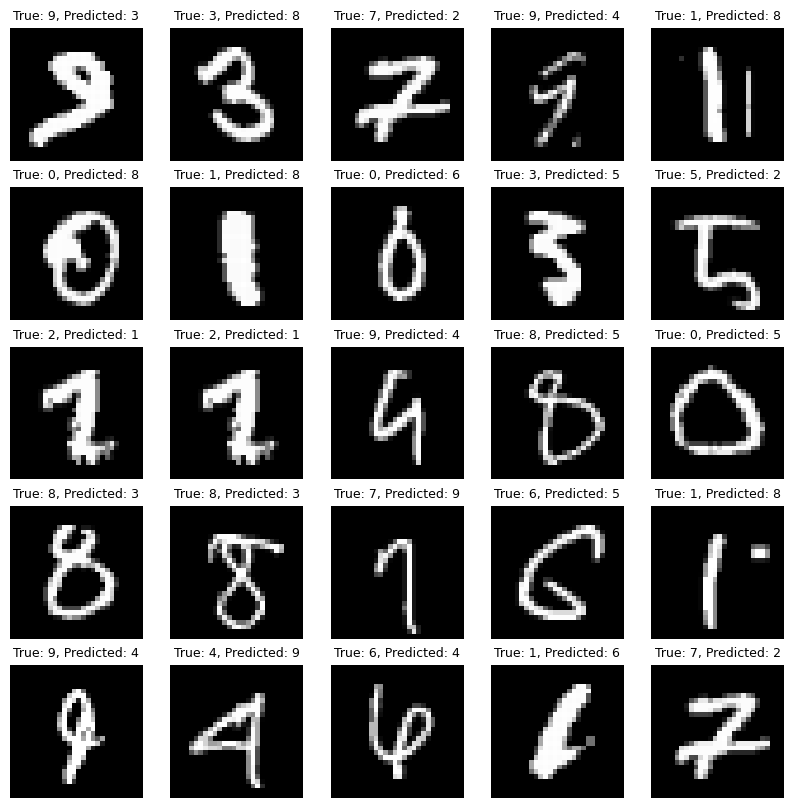

In [ ]:
predictions = modelSGD.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Encontrar índices das previsões erradas
incorrect_indices = np.where(predicted_labels != true_labels)[0]
print(f'Quantidade de Previsões erradas: {len(incorrect_indices)}')
if(len(incorrect_indices) < 25):
  random_indices = np.random.choice(incorrect_indices,size= len(incorrect_indices),replace=True)
else:
  random_indices = np.random.choice(incorrect_indices, 25,replace=True)
print(f'Indices Selecionados: {random_indices}')
images = x_test[random_indices]
labels = true_labels[random_indices]
predicted = predicted_labels[random_indices]
plt.figure(figsize=(10,10))

for idx in range(len(random_indices)):
    image = images[idx]
    true_label = labels[idx]
    predicted_label = predicted[idx]
    plt.subplot(5, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}',fontsize=9)
plt.show()